In [1]:
# Load extensions
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Importeren van bibliotheken
import math
import numpy as np
import matplotlib.pyplot as plt

from berekeningen_1piloon import Brug

# Brug met 2 masten en variabele afstand tussen tuien

![vlot-op-zee.svg](../figures/vlot-op-zee.svg)

In [3]:
h = 0.7
N = np.linspace(2/7, 6*2/7, num=6)
#N = np.sort(np.random.uniform(0, 2, 6))
da = 1
db = 0.05

In [4]:
brug = Brug(h, da, db, N)
brug.__dict__

{'h': 0.7,
 'da': 1,
 'db': 0.05,
 'N': array([0.28571429, 0.57142857, 0.85714286, 1.14285714, 1.42857143,
        1.71428571]),
 'cosa': array([0.43243193, 0.66389006, 0.79169611, 0.86246479, 0.90382673,
        0.92951119]),
 'sina': array([0.90166658, 0.74783018, 0.61091511, 0.50611706, 0.42789864,
        0.36879391]),
 'P': array([0.        , 0.28571429, 0.57142857, 0.85714286, 1.14285714,
        1.42857143, 1.71428571, 2.        ]),
 'deeltje': [0.2857142857142857,
  0.2857142857142857,
  0.2857142857142857,
  0.2857142857142857,
  0.2857142857142856,
  0.2857142857142858,
  0.2857142857142858]}

In [5]:
brug.calc_reactie_krachten()

array([ 58.75714286, 117.51428571, 250.84761905, 184.18095238,
       117.51428571, 117.51428571, 117.51428571,  58.75714286])

In [6]:
brug.calc_touw_kracht()

(array([130.33008889, 335.43393154, 301.48370838, 232.18795441,
        274.63112479, 318.64486263]),
 array([ 56.35889213, 222.69125364, 238.68347911, 200.25393586,
        248.21895044, 296.18396501]))

In [7]:
brug.calc_kant()

(-1262.3904761904762,
 -930.182456140351,
 1568.078160069744,
 0,
 -1262.3904761904762,
 [])

### Wegdek

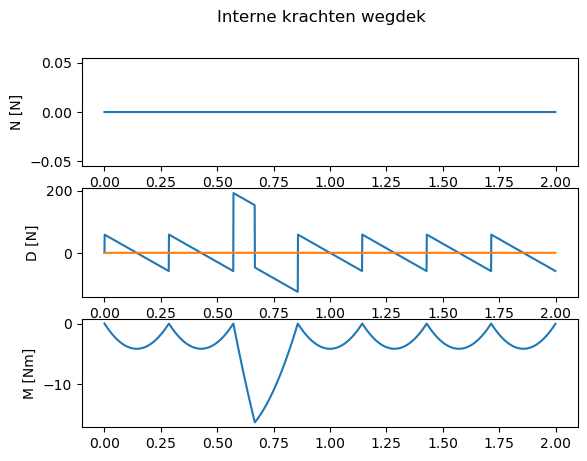

In [8]:
x = np.arange(0, 2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_wegdek(xi) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten wegdek")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.set_ylabel("N [N]")
ax2 = plt.subplot(3,1,2, sharex=ax1)
ax2.plot(x, D)
ax2.set_ylabel("D [N]")
ax2.plot(x, [0]*len(x))
ax3 = plt.subplot(3,1,3, sharex=ax1)
ax3.plot(x, [-m for m in M])
ax3.set_ylabel("M [Nm]")
plt.savefig("figs/wegdek-vlot-op-zee")

### Doorbuiging wegdek

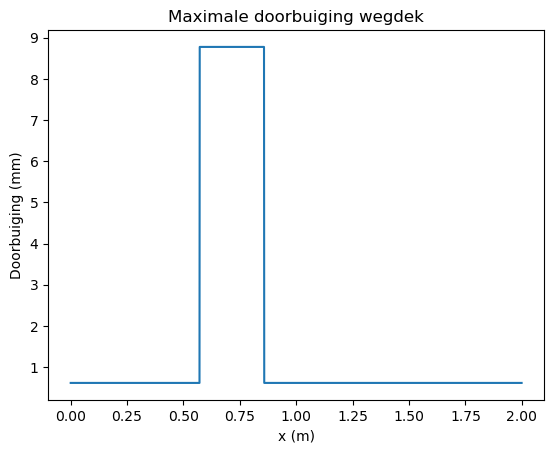

In [9]:
x = np.arange(0, 2, 0.001)
f = [brug.calc_doorbuiging_wegdek(xi)*10**3 for xi in x]

plt.plot(x, f)
plt.title("Maximale doorbuiging wegdek")
plt.xlabel("x (m)")
plt.ylabel("Doorbuiging (mm)")
plt.savefig("figs/wegdek-doorbuiging-vlot-op-zee")

### Piloon

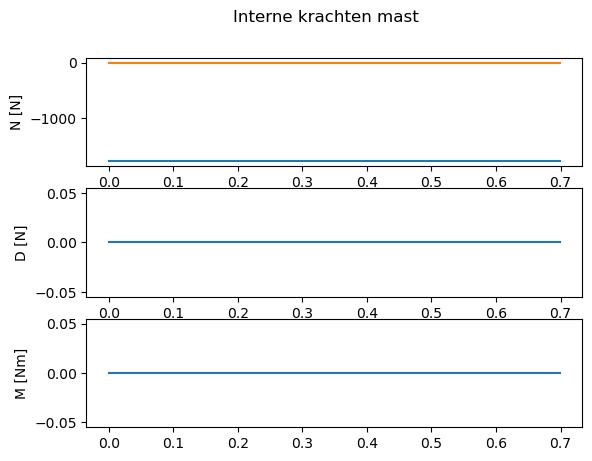

In [10]:
x = np.arange(0, brug.h, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten mast")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N [N]")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D [N]")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M [Nm]")
plt.savefig("figs/piloon1-vlot-op-zee")

### Traagheidsmoment

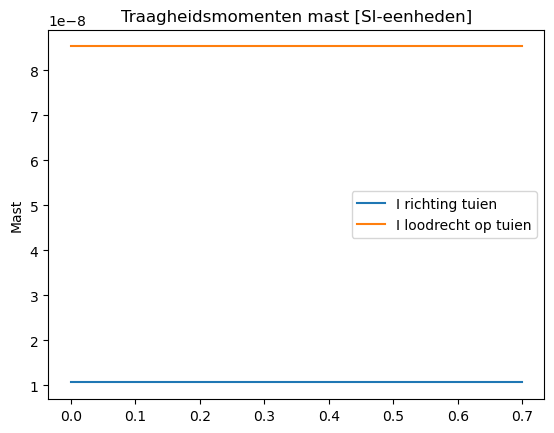

In [11]:
step = 0.001

x1 = np.arange(0, brug.h, step)
I1 = [brug.calc_piloon_I(xi, True) for xi in x1]

plt.title("Traagheidsmomenten mast [SI-eenheden]")
plt.plot(x1, I1)
plt.ylabel("Mast")
plt.legend(["I richting tuien", "I loodrecht op tuien"], loc="center right")

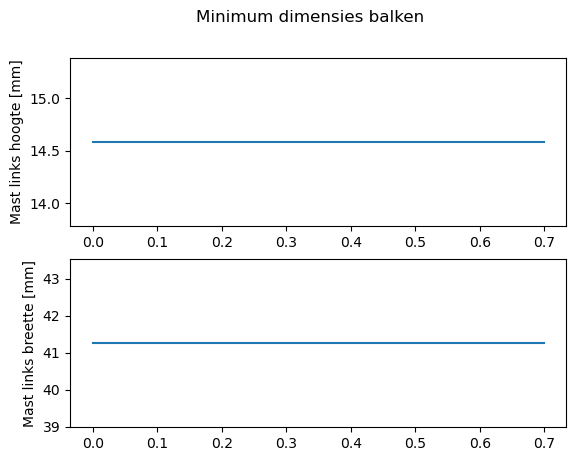

In [12]:
step = 0.001

x1 = np.arange(0, brug.h, step)
hb1 = list(zip(*[brug.calc_piloon_balk(xi, True) for xi in x1]))

fig = plt.figure()
fig.suptitle("Minimum dimensies balken")

ax1 = plt.subplot(2,1,1)
ax1.plot(x1, [h1*1000 for h1 in hb1[0]])
ax1.set_ylabel("Mast links hoogte [mm]")
ax2 = plt.subplot(2,1,2)
ax2.plot(x1, [b1*1000 for b1 in hb1[1]])
ax2.set_ylabel("Mast links breette [mm]")

plt.savefig("figs/minimum-balk-dim-vlot-op-zee")